# Optimal Analysis For The Best Solar Region

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Access the 'data' DataFrames
togo = pd.read_csv('../data/raw/togo.csv', parse_dates=['Timestamp'],  date_format='%Y-%m-%d %H:%M', index_col='Timestamp')
benin = pd.read_csv('../data/raw/benin.csv', parse_dates=['Timestamp'],  date_format='%Y-%m-%d %H:%M', index_col='Timestamp')
sierraleone = pd.read_csv('../data/raw/sierraleone.csv', parse_dates=['Timestamp'],  date_format='%Y-%m-%d %H:%M', index_col='Timestamp')

In [18]:
# Data Cleaning

# Dropping missing values
df_togo = togo.dropna(axis=1)
df_benin = benin.dropna(axis=1)
df_sierraleone = sierraleone.dropna(axis=1)

# Correcting incorrect entries
## changing the neagative values of GHI column with zero
df_togo.loc[df_togo['GHI'] < 0, 'GHI'] = 0
df_benin.loc[df_benin['GHI'] < 0, 'GHI'] = 0
df_sierraleone.loc[df_sierraleone['GHI'] < 0, 'GHI'] = 0


The starting and ending dates for each country is different.      

*   The Togo data starts at 2021-10-25 to 2022-10-25,
*   The Benin data starts at 2021-08-09 to 2022-08-09 and
*   The Sierraleone data starts at 2021-10-30 to 2022-10-30.

To compare the datas we need to have same dates to see the variables(irradiance, temperature, ...) difference in each data. So, we picked the dates that align with the thrree countries which is from **2021-10-30** to **2022-08-09**.

We can check by using head and tail functions the alignments of the timeframes

In [19]:
# Align the timeframes
start_date = max(df_togo.index[0], df_benin.index[0], df_sierraleone.index[0])
end_date = min(df_togo.index[-1], df_benin.index[-1], df_sierraleone.index[-1])
df_togo = df_togo.loc[start_date:end_date]
df_benin = df_benin.loc[start_date:end_date]
df_sierraleone = df_sierraleone.loc[start_date:end_date]

In [20]:
df_togo.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,0.0,0.0,0.0,0.0,0.0,25.3,78.5,1.5,1.9,0.4,246.5,5.6,975,0,0.0,23.6,23.1
2021-10-30 00:02:00,0.0,0.0,0.0,0.0,0.0,25.3,78.3,1.7,2.1,0.4,245.4,5.4,975,0,0.0,23.6,23.1
2021-10-30 00:03:00,0.0,0.0,0.0,0.0,0.0,25.3,78.2,1.7,1.9,0.3,243.3,2.9,975,0,0.0,23.6,23.1
2021-10-30 00:04:00,0.0,0.0,0.0,0.0,0.0,25.4,78.1,1.6,1.9,0.4,244.1,2.0,975,0,0.0,23.6,23.1
2021-10-30 00:05:00,0.0,0.0,0.0,0.0,0.0,25.4,78.1,1.6,1.9,0.4,237.1,3.3,975,0,0.0,23.6,23.1


In [21]:
df_benin.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,0.0,-0.5,-2.1,0.0,0.0,25.0,77.4,2.1,2.4,0.4,237.5,4.0,994,0,0.0,23.5,22.8
2021-10-30 00:02:00,0.0,-0.5,-2.1,0.0,0.0,25.0,77.6,2.0,2.4,0.4,239.3,4.8,994,0,0.0,23.4,22.8
2021-10-30 00:03:00,0.0,-0.5,-2.1,0.0,0.0,24.9,77.8,1.9,2.4,0.4,241.0,5.7,994,0,0.0,23.4,22.8
2021-10-30 00:04:00,0.0,-0.5,-2.1,0.0,0.0,24.9,77.9,2.1,2.6,0.4,240.5,6.0,994,0,0.0,23.4,22.8
2021-10-30 00:05:00,0.0,-0.5,-2.1,0.0,0.0,24.9,78.0,2.2,2.6,0.4,239.1,6.8,994,0,0.0,23.4,22.8


In [22]:
df_sierraleone.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,0.0,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:02:00,0.0,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:03:00,0.0,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:04:00,0.0,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
2021-10-30 00:05:00,0.0,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [23]:
df_togo.tail()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2022-08-08 23:56:00,0.0,0.0,0.0,0.0,0.0,23.0,90.9,2.9,3.9,0.6,260.0,10.5,976,0,0.0,23.3,22.9
2022-08-08 23:57:00,0.0,0.0,0.0,0.0,0.0,23.0,90.9,2.9,3.6,0.5,265.0,11.8,976,0,0.0,23.3,22.9
2022-08-08 23:58:00,0.0,0.0,0.0,0.0,0.0,23.0,91.0,3.1,4.1,0.8,268.4,12.2,976,0,0.0,23.3,22.9
2022-08-08 23:59:00,0.0,0.0,0.0,0.0,0.0,22.9,91.1,2.9,3.9,0.5,265.3,11.4,976,0,0.0,23.3,22.9
2022-08-09 00:00:00,0.0,0.0,0.0,0.0,0.0,22.9,91.2,3.0,3.6,0.5,266.9,12.9,976,0,0.0,23.3,23.0


In [24]:
df_benin.tail()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2022-08-08 23:56:00,0.0,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9
2022-08-08 23:57:00,0.0,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9
2022-08-08 23:58:00,0.0,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9
2022-08-08 23:59:00,0.0,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9
2022-08-09 00:00:00,0.0,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9


In [25]:
df_sierraleone.tail()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2022-08-08 23:56:00,0.0,-0.6,-2.4,0.0,0.0,24.1,96.8,2.4,3.4,0.5,237.7,9.4,1003,0,0.1,24.5,24.8
2022-08-08 23:57:00,0.0,-0.5,-2.4,0.0,0.0,24.1,97.2,2.6,3.9,0.8,228.5,16.0,1003,0,0.0,24.4,24.7
2022-08-08 23:58:00,0.0,-0.5,-2.4,0.0,0.0,24.0,97.2,2.4,3.1,0.5,241.4,9.0,1003,0,0.0,24.4,24.7
2022-08-08 23:59:00,0.0,-0.5,-2.4,0.0,0.0,24.0,97.1,1.9,2.4,0.4,229.6,9.1,1002,0,0.0,24.4,24.7
2022-08-09 00:00:00,0.0,-0.5,-2.4,0.0,0.0,24.0,97.5,2.0,2.9,0.4,234.0,9.4,1002,0,0.0,24.3,24.6


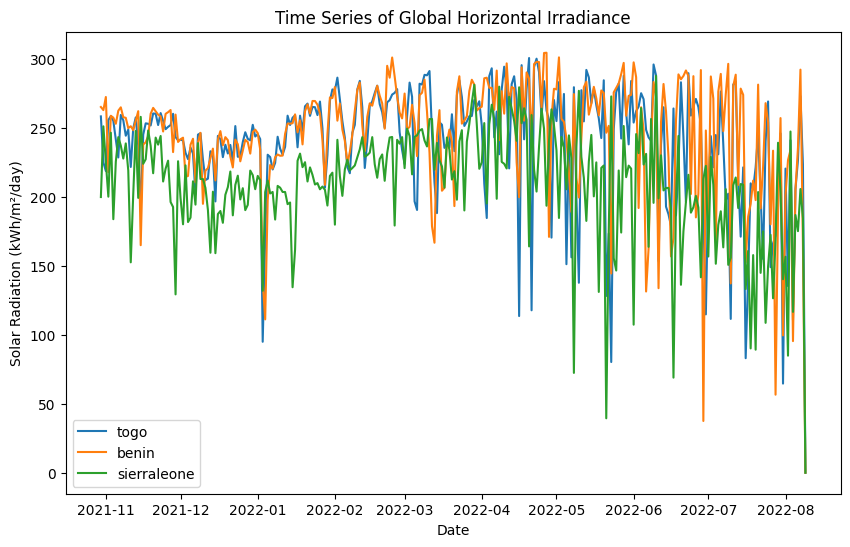

In [26]:
# Resample to daily mean
daily_mean_togo = df_togo['GHI'].resample('D').mean()
daily_mean_benin = df_benin['GHI'].resample('D').mean()
daily_mean_sierraleone = df_sierraleone['GHI'].resample('D').mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_togo.index, daily_mean_togo.values, label='togo')
plt.plot(daily_mean_benin.index, daily_mean_benin.values, label='benin')
plt.plot(daily_mean_sierraleone.index, daily_mean_sierraleone.values, label='sierraleone')
plt.xlabel('Date')
plt.ylabel('Solar Radiation (kWh/m²/day)')
plt.title('Time Series of Global Horizontal Irradiance')
plt.legend()
plt.show()

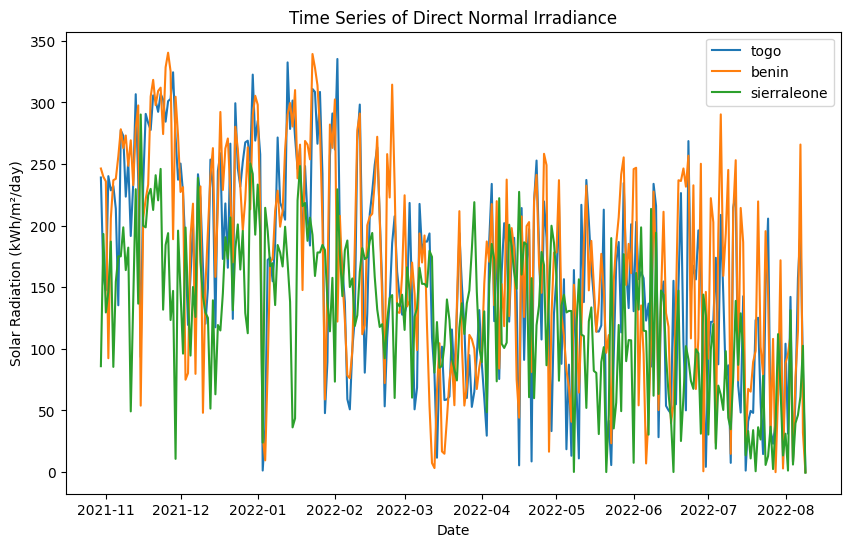

In [27]:
# Resample to daily mean
daily_mean_togo = df_togo['DNI'].resample('D').mean()
daily_mean_benin = df_benin['DNI'].resample('D').mean()
daily_mean_sierraleone = df_sierraleone['DNI'].resample('D').mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_togo.index, daily_mean_togo.values, label='togo')
plt.plot(daily_mean_benin.index, daily_mean_benin.values, label='benin')
plt.plot(daily_mean_sierraleone.index, daily_mean_sierraleone.values, label='sierraleone')
plt.xlabel('Date')
plt.ylabel('Solar Radiation (kWh/m²/day)')
plt.title('Time Series of Direct Normal Irradiance')
plt.legend()
plt.show()

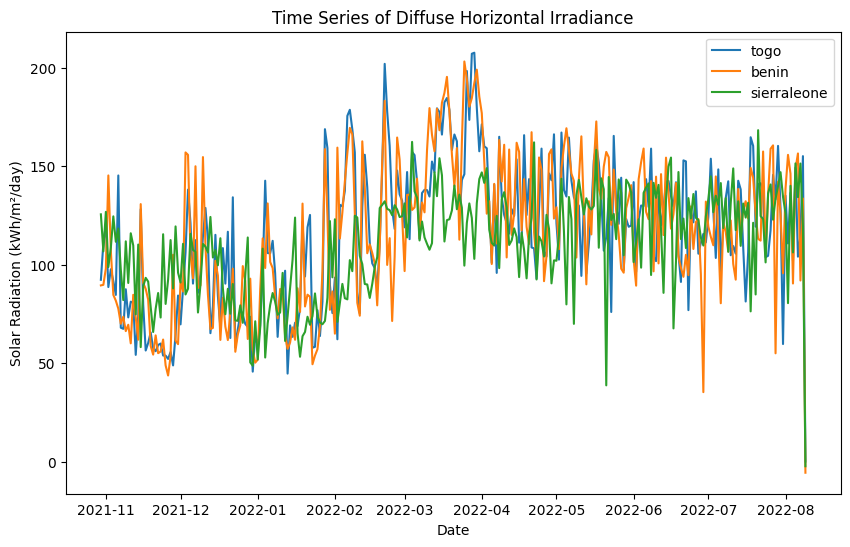

In [28]:
# Resample to daily mean
daily_mean_togo = df_togo['DHI'].resample('D').mean()
daily_mean_benin = df_benin['DHI'].resample('D').mean()
daily_mean_sierraleone = df_sierraleone['DHI'].resample('D').mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_togo.index, daily_mean_togo.values, label='togo')
plt.plot(daily_mean_benin.index, daily_mean_benin.values, label='benin')
plt.plot(daily_mean_sierraleone.index, daily_mean_sierraleone.values, label='sierraleone')
plt.xlabel('Date')
plt.ylabel('Solar Radiation (kWh/m²/day)')
plt.title('Time Series of Diffuse Horizontal Irradiance')
plt.legend()
plt.show()

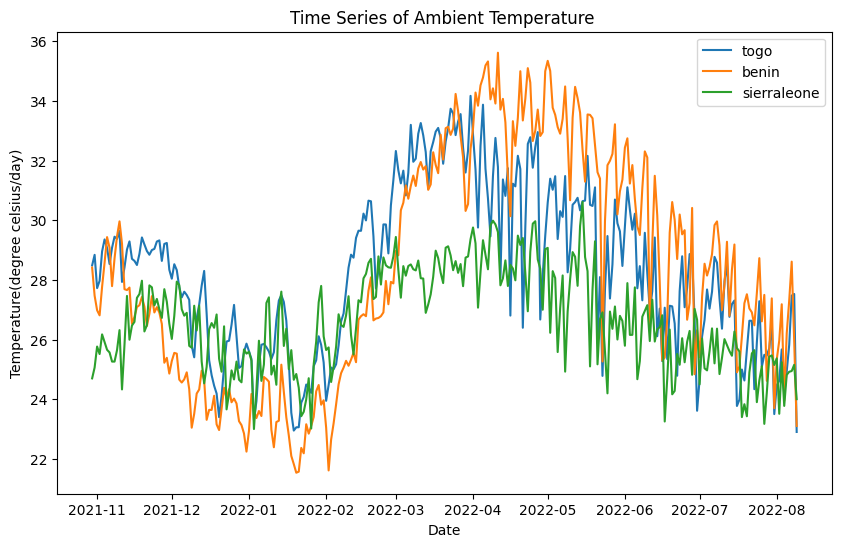

In [29]:
# Resample to daily mean
daily_mean_togo = df_togo['Tamb'].resample('D').mean()
daily_mean_benin = df_benin['Tamb'].resample('D').mean()
daily_mean_sierraleone = df_sierraleone['Tamb'].resample('D').mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_togo.index, daily_mean_togo.values, label='togo')
plt.plot(daily_mean_benin.index, daily_mean_benin.values, label='benin')
plt.plot(daily_mean_sierraleone.index, daily_mean_sierraleone.values, label='sierraleone')
plt.xlabel('Date')
plt.ylabel('Temperature(degree celsius/day)')
plt.title('Time Series of Ambient Temperature ')
plt.legend()
plt.show()